<a href="https://colab.research.google.com/github/springtimeofyouth/Pneumonia_classification/blob/main/Pneumonia_Detection_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we are importing directly from kaggle, since it is a large dataset. Go to Kaggle and generate an api token. A .json file will downloaded. Upload it when you run the second cell.

Link: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [ ]:
#install kaggle
!pip install -q kaggle

In [1]:
#from google.colab import files
#files.upload()
#Uncomment and run the 1st 2 lines and upload your downloaded kaggle api

In [ ]:
#create a kaggle directory
! mkdir ~/.kaggle

In [ ]:
#copy the json file to the folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#Grant Permission
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to list all the datasets in kaggle
! kaggle datasets list

ref                                                             title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
carlmcbrideellis/llm-7-prompt-training-dataset                  LLM: 7 prompt training dataset                     41MB  2023-11-15 07:32:56            886         79  1.0              
thedrcat/daigt-proper-train-dataset                             DAIGT Proper Train Dataset                        119MB  2023-11-05 14:03:25            962        111  1.0              
joebeachcapital/30000-spotify-songs                             30000 Spotify Songs                                 3MB  2023-11-01 06:06:43           5637        142  1.0              
thedrcat/daigt-v2-train-dataset                                 DAIGT 

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:16<00:00, 293MB/s]
100% 2.29G/2.29G [00:16<00:00, 149MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

# Pneumonia Detection with Convolutional Neural Networks
Computer Vision can be realized using Convolutional neural networks (CNN) They are neural networks making features extraction over an image before classifying it. The feature extraction performed consists of three basic operations:

* Filter an image for a particular feature (convolution)
* Detect that feature within the filtered image (using the ReLU activation)
* Condense the image to enhance the features (maximum pooling)

The convolution process is illustrated below

![Image-1](https://miro.medium.com/v2/resize:fit:678/1*-OM6jQTMNACDX2vAh_lvMQ.png)


Using convolution filters with different dimensions or values results in differents features extracted

Features are then detected using the reLu activation on each destination pixel.

![Relu](https://miro.medium.com/max/1000/1*3JUMOqugWKB2SDra6x6v0A.png)

Features are the enhanced with MaxPool layers

![Maxpool](https://production-media.paperswithcode.com/methods/MaxpoolSample2.png)

The stride parameters determines the distance between each filters. The padding one determines if we ignore the borderline pixels or not (adding zeros helps the neural network to get information on the border)

![download3.png](https://i1.wp.com/www.brilliantcode.net/wp-content/uploads/2019/08/CNN_Tutorial_padding.png?resize=800%2C529&ssl=1)

The outputs are then concatened in Dense layers

![download4.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzpcDiYIuH4Rw8Th-kQm9RRaJ8ppvoYjqKLQ&usqp=CAU)

By using a sigmoid activation, the neural network determines which class the image belongs to
![download5.png](https://miro.medium.com/v2/resize:fit:1200/1*a04iKNbchayCAJ7-0QlesA.png)

##  Import Packages and Functions
We'll make use of the following packages:

* numpy and pandas is what we'll use to manipulate our data
* matplotlib.pyplot and seaborn will be used to produce plots for visualization
* util will provide the locally defined utility functions that have been provided for this assignment
* We will also use several modules from the keras framework for building deep learning models.

Run the next cell to import all the necessary packages.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("chest_xray")

['__MACOSX', 'chest_xray', 'train', 'test', 'val']

In [ ]:
len(os.listdir("chest_xray/train/PNEUMONIA"))

3875

The dataset is divided into three sets:
- 1) Train set
- 2) Validation set
- 3) Test set.

# DATA VISUALIZATION

Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


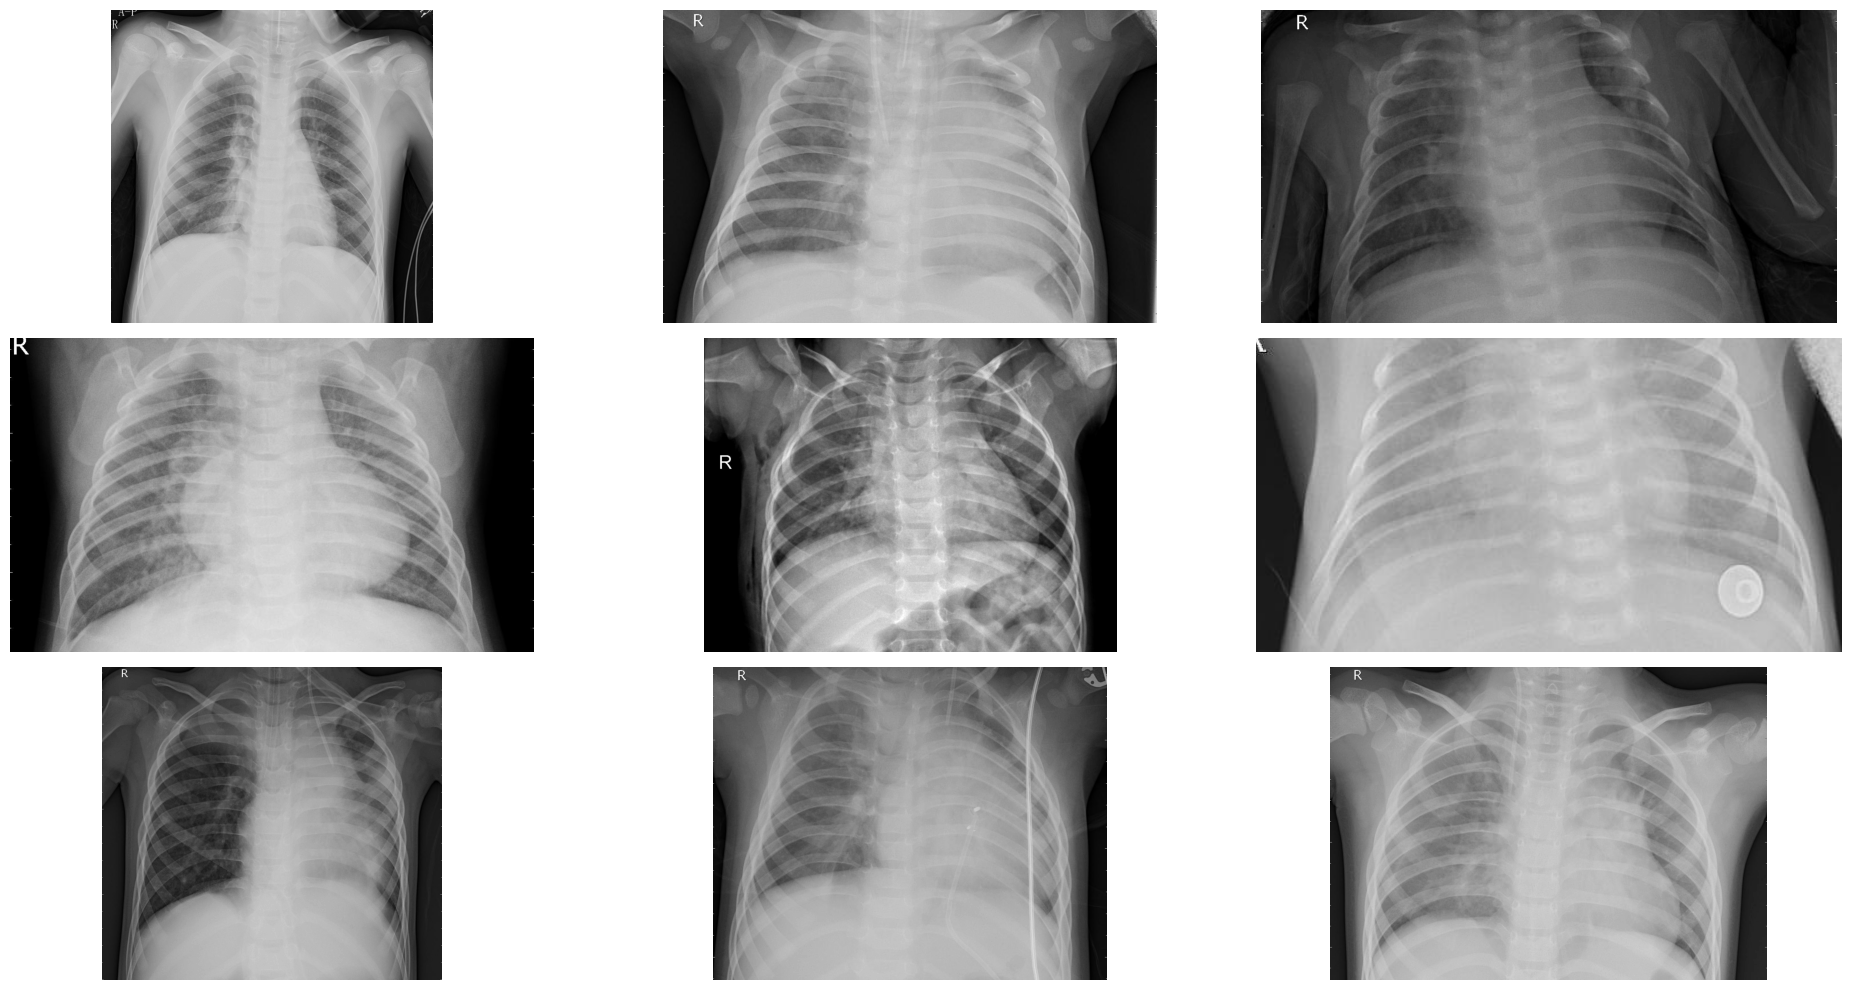

In [ ]:
train_dir = "chest_xray/train"
test_dir = "chest_xray/test"
val_dir = "chest_xray/val"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
pneumonia_dir = "chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

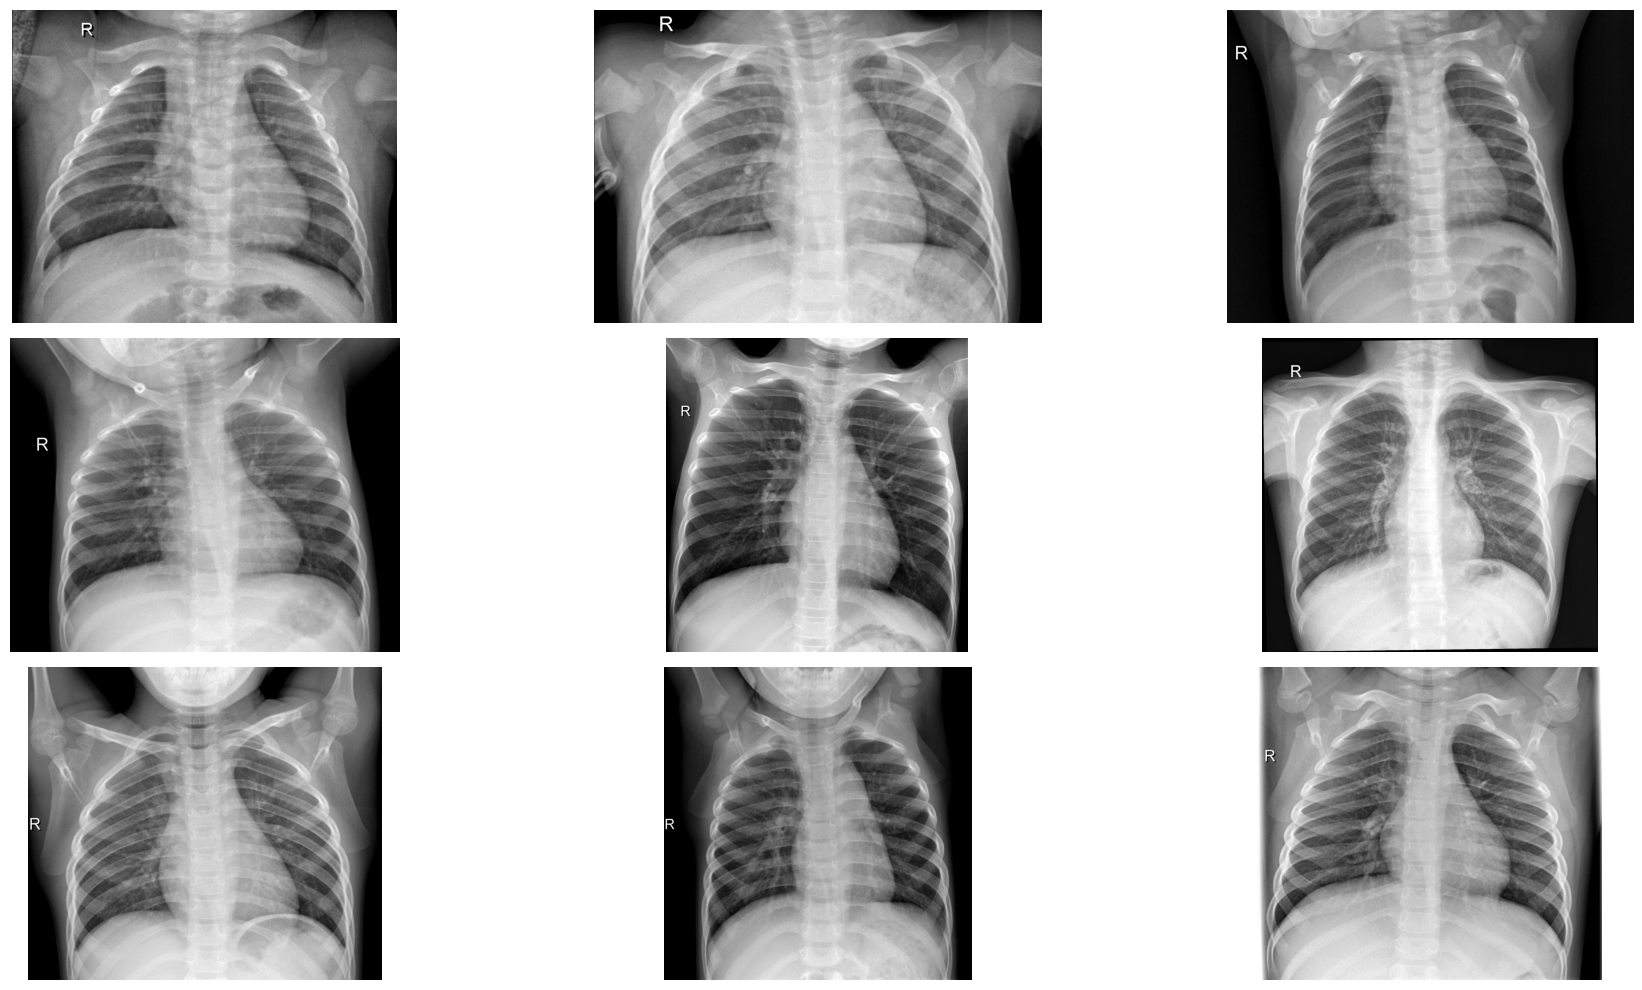

In [ ]:
normal = os.listdir("chest_xray/train/NORMAL")
normal_dir = "chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

The dimensions of the image are 974 pixels width and 1196 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 127.1609 and the standard deviation is 47.8938


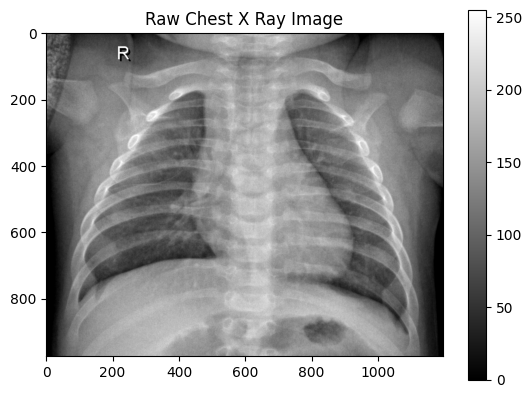

In [ ]:
normal_img = os.listdir("chest_xray/train/NORMAL")[0]
normal_dir = "chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

<ipython-input-14-d45ac08d2db9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

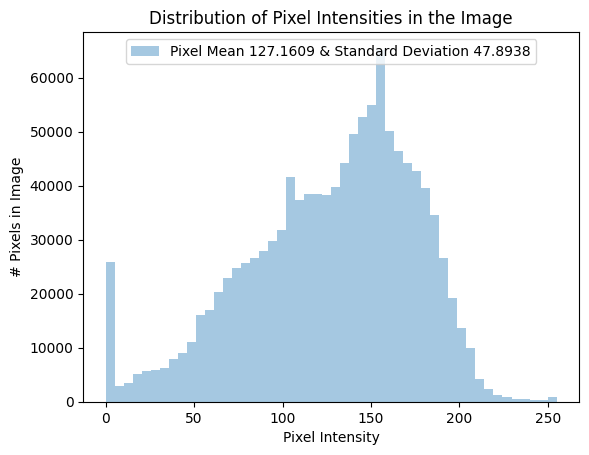

In [ ]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# 2. Image Preprocessing
Before training, we'll first modify your images to be better suited for training a convolutional neural network. For this task we'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

This class also provides support for basic data augmentation such as random horizontal flipping of images.
We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1 (this will faciliate model training by standardizing the input distribution).
The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Build a separate generator fo valid and test sets

A separate generator must be constructed for the validation and testing data instead of using the same generator as for the training data.

When revisiting the generator designed for the training data, it is evident that it performs normalization on each image per batch, utilizing batch-specific statistics. This approach isn't suitable for the test and validation data due to the real-world scenario where images are processed individually rather than in batches.

Using batch statistics for the test and validation data could potentially confer an advantage to the model, which should remain unaware of any information regarding the test data. The procedure that needs to be executed involves normalizing incoming test data based on the statistical measures computed from the training set.


In [ ]:
train = image_generator.flow_from_directory(train_dir,
                                            batch_size=8,
                                            shuffle=True,
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir,
                                                batch_size=1,
                                                shuffle=False,
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir,
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 2.6945 and the minimum is -3.1493
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


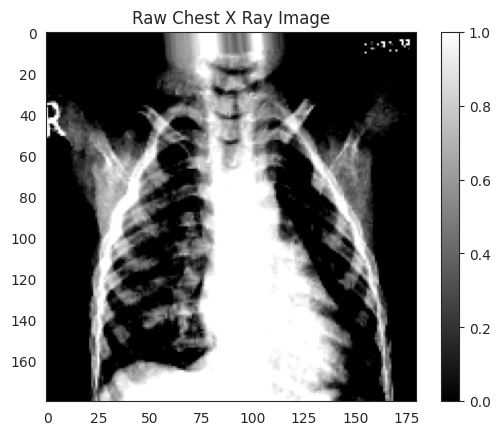

In [ ]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

# Building a CNN model

## Impact of imbalance data on loss function

Loss Function:
$$\mathcal{L}_{cross-entropy}(x_i) = -(y_i \log(f(x_i)) + (1-y_i) \log(1-f(x_i))),$$

We can rewrite the the overall average cross-entropy loss over the entire training set `D` of size `N` as follows:
$$\mathcal{L}_{cross-entropy}(\mathcal{D}) = - \frac{1}{N}\big( \sum_{\text{positive examples}} \log (f(x_i)) + \sum_{\text{negative examples}} \log(1-f(x_i)) \big).$$



When we have an imbalance data, using a normal loss function will result a model that bias toward the dominating class. One solution is to use a weighted loss function. Using weighted loss function will balance the contribution in the loss function.

$$\mathcal{L}_{cross-entropy}^{w}(x) = - (w_{p} y \log(f(x)) + w_{n}(1-y) \log( 1 - f(x) ) ).$$

In [ ]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 178, 178, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 176, 176, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 32)        0         
 D)                                                              
                                                        

In [ ]:
r = model.fit(
    train,
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=10,
)

Epoch 1/10
100/100 [==============================] - 31s 157ms/step - loss: 1.3375 - accuracy: 0.7563 - val_loss: 33.0173 - val_accuracy: 0.2000
Epoch 2/10
100/100 [==============================] - 16s 155ms/step - loss: 0.3263 - accuracy: 0.7475 - val_loss: 12.3979 - val_accuracy: 0.2000
Epoch 3/10
100/100 [==============================] - 15s 151ms/step - loss: 0.1885 - accuracy: 0.8138 - val_loss: 13.6329 - val_accuracy: 0.2000
Epoch 4/10
100/100 [==============================] - 18s 174ms/step - loss: 0.1540 - accuracy: 0.8763 - val_loss: 16.8906 - val_accuracy: 0.2000
Epoch 5/10
100/100 [==============================] - 20s 203ms/step - loss: 0.1186 - accuracy: 0.8913 - val_loss: 8.0091 - val_accuracy: 0.4000
Epoch 6/10
100/100 [==============================] - 19s 179ms/step - loss: 0.1245 - accuracy: 0.8963 - val_loss: 5.1803 - val_accuracy: 0.4000
Epoch 7/10
100/100 [==============================] - 17s 172ms/step - loss: 0.1356 - accuracy: 0.8913 - val_loss: 5.2655 - va

Text(0.5, 1.0, 'Accuracy Evolution')

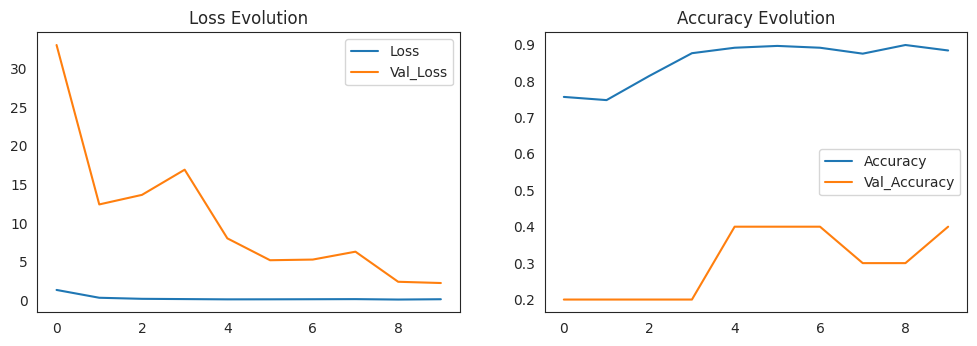

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 13s 21ms/step - loss: 0.4977 - accuracy: 0.7949
Test Accuracy: 79.49%
652/652 [==============================] - 101s 154ms/step - loss: 0.1663 - accuracy: 0.9396
Train Accuracy: 93.96%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

624/624 [==============================] - 11s 18ms/step
[[122 112]
 [  7 383]]


,0,1,accuracy,macro avg,weighted avg
precision,0.945736,0.773737,0.809295,0.859737,0.838237
recall,0.521368,0.982051,0.809295,0.751709,0.809295
f1-score,0.672176,0.865537,0.809295,0.768857,0.793027
support,234.000000,390.000000,0.809295,624.000000,624.000000


In [ ]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[152  82]
 [ 20 370]]


,0,1,accuracy,macro avg,weighted avg
precision,0.883721,0.818584,0.836538,0.851153,0.843010
recall,0.649573,0.948718,0.836538,0.799145,0.836538
f1-score,0.748768,0.878860,0.836538,0.813814,0.830076
support,234.000000,390.000000,0.836538,624.000000,624.000000


# Transfer Learning
# DenseNet
Densenet is a convolutional network where each layer is connected to all other layers that are deeper in the network:

* The first layer is connected to the 2nd, 3rd, 4th etc.
* The second layer is conected to the 3rd, 4th, 5th etc.

![download.png](https://production-media.paperswithcode.com/models/densenet121_spXhNmT.png)

for more information about the DenseNet Architecture visit this website : https://keras.io/api/applications/densenet/


In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 zero_padding2d_4 (ZeroPadd  (None, 186, 186, 3)          0         ['input_6[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 90, 90, 64)           9408      ['zero_padding2d_4[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1/conv[0][0]']

In [ ]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [ ]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [ ]:
#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
r = model.fit(
    train,
    epochs=10,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=10,
)

Epoch 1/10
100/100 [==============================] - 74s 199ms/step - loss: 0.1835 - accuracy: 0.8288 - val_loss: 0.3582 - val_accuracy: 0.9000
Epoch 2/10
100/100 [==============================] - 20s 194ms/step - loss: 0.1083 - accuracy: 0.8913 - val_loss: 0.1890 - val_accuracy: 0.9000
Epoch 3/10
100/100 [==============================] - 19s 188ms/step - loss: 0.0880 - accuracy: 0.9137 - val_loss: 1.9156 - val_accuracy: 0.5000
Epoch 4/10
100/100 [==============================] - 20s 202ms/step - loss: 0.0886 - accuracy: 0.9075 - val_loss: 0.8308 - val_accuracy: 0.4000
Epoch 5/10
100/100 [==============================] - 19s 185ms/step - loss: 0.0929 - accuracy: 0.9038 - val_loss: 0.9626 - val_accuracy: 0.8000
Epoch 6/10
100/100 [==============================] - 18s 185ms/step - loss: 0.0869 - accuracy: 0.9062 - val_loss: 0.3653 - val_accuracy: 0.9000
Epoch 7/10
100/100 [==============================] - 20s 200ms/step - loss: 0.1078 - accuracy: 0.8813 - val_loss: 0.8687 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

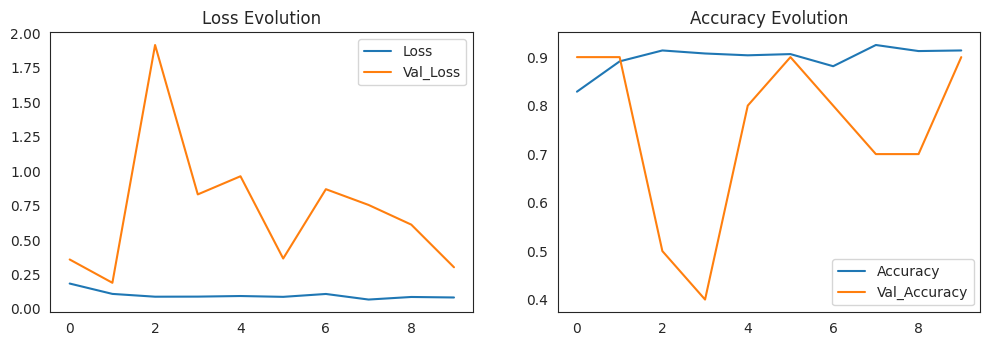

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 17s 28ms/step - loss: 0.3872 - accuracy: 0.8365
Test Accuracy: 83.65%
652/652 [==============================] - 100s 154ms/step - loss: 0.6171 - accuracy: 0.7512
Train Accuracy: 75.12%


# Evaluation

In [ ]:
predicted_vals = model.predict(test, steps=len(test))

624/624 [==============================] - 20s 29ms/step


In [ ]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[223  11]
 [107 283]]


,0,1,accuracy,macro avg,weighted avg
precision,0.675758,0.962585,0.810897,0.819171,0.855025
recall,0.952991,0.725641,0.810897,0.839316,0.810897
f1-score,0.790780,0.827485,0.810897,0.809133,0.813721
support,234.000000,390.000000,0.810897,624.000000,624.000000


# VGG16
Presented in 2014, VGG16 has a very simple and classical architecture, with blocks of 2 or 3 convolutional layers followed by a pooling layer, plus a final dense network composed of 2 hidden layers (of 4096 nodes each) and one output layer (of 1000 nodes). Only 3x3 filters are used.

![download7.png](https://miro.medium.com/v2/resize:fit:1400/1*NNifzsJ7tD2kAfBXt3AzEg.png)

In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
vgg16_model = Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

model = Sequential()
model.add(vgg16_model.layers[0])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=10)

Epoch 1/10
100/100 [==============================] - 28s 185ms/step - loss: 0.2887 - accuracy: 0.6175 - precision: 0.8402 - recall: 0.5911 - val_loss: 16.3491 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 22s 219ms/step - loss: 0.2132 - accuracy: 0.7300 - precision: 0.9165 - recall: 0.6940 - val_loss: 4.9901 - val_accuracy: 0.2000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 3/10
100/100 [==============================] - 19s 187ms/step - loss: 0.2031 - accuracy: 0.7437 - precision: 0.9167 - recall: 0.7210 - val_loss: 16.3504 - val_accuracy: 0.2000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 4/10
100/100 [==============================] - 33s 329ms/step - loss: 0.1856 - accuracy: 0.7788 - precision: 0.9293 - recall: 0.7576 - val_loss: 2.5198 - val_accuracy: 0.4000 - val_precision: 0.2500 - val_recall: 1.0000
Epoch 5/10
100/100 [==============================] - 20s 201ms/step - loss: 0.182

Text(0.5, 1.0, 'Accuracy Evolution')

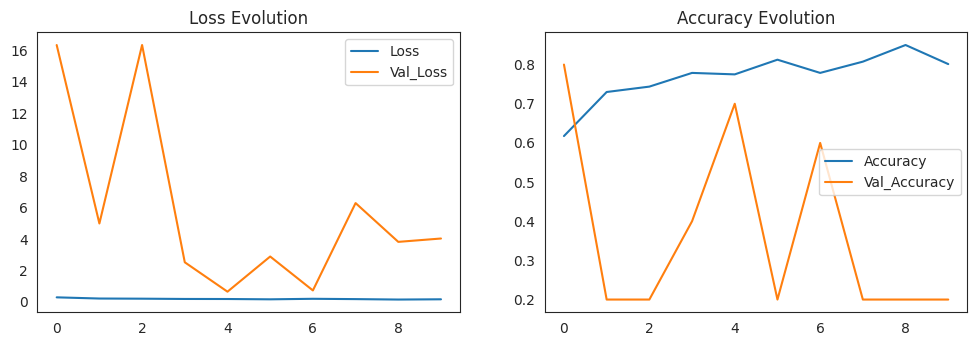

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 14s 22ms/step - loss: 1.6957 - accuracy: 0.6250 - precision: 0.6250 - recall: 1.0000
Test Accuracy: 62.50%
652/652 [==============================] - 100s 153ms/step - loss: 0.8966 - accuracy: 0.7444 - precision: 0.7450 - recall: 0.9974
Train Accuracy: 74.44%


# Evaluation

In [ ]:
predicted_vals = vgg16_model.predict(test, steps=len(test))

624/624 [==============================] - 13s 20ms/step


In [ ]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[  2 232]
 [  1 389]]


,0,1,accuracy,macro avg,weighted avg
precision,0.666667,0.626409,0.626603,0.646538,0.641506
recall,0.008547,0.997436,0.626603,0.502991,0.626603
f1-score,0.016878,0.769535,0.626603,0.393206,0.487289
support,234.000000,390.000000,0.626603,624.000000,624.000000


# ResNet

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

In [ ]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
resnet_model = Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = resnet_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=10)

Epoch 1/10
100/100 [==============================] - 54s 195ms/step - loss: 0.2709 - accuracy: 0.6275 - precision: 0.8471 - recall: 0.6071 - val_loss: 1123.8533 - val_accuracy: 0.2000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 2/10
100/100 [==============================] - 26s 257ms/step - loss: 0.2784 - accuracy: 0.6562 - precision: 0.8571 - recall: 0.6454 - val_loss: 0.5441 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 23s 234ms/step - loss: 0.2894 - accuracy: 0.6087 - precision: 0.8180 - recall: 0.6337 - val_loss: 8.1895 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 18s 181ms/step - loss: 0.2838 - accuracy: 0.6313 - precision: 0.8091 - recall: 0.6431 - val_loss: 0.8926 - val_accuracy: 0.2000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 5/10
100/100 [==============================] - 18s 178ms/step - lo

Text(0.5, 1.0, 'Accuracy Evolution')

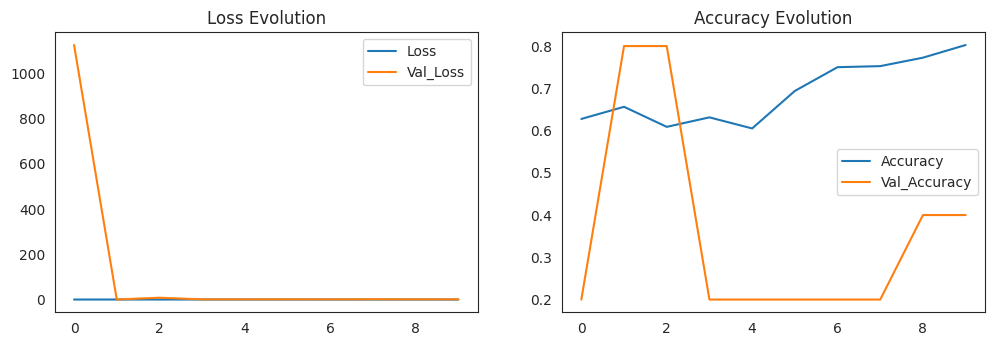

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 16s 25ms/step - loss: 0.4715 - accuracy: 0.8029 - precision: 0.8097 - recall: 0.8949
Test Accuracy: 80.29%
652/652 [==============================] - 97s 149ms/step - loss: 0.4480 - accuracy: 0.8599 - precision: 0.9381 - recall: 0.8686
Train Accuracy: 85.99%


# Evaluation

In [ ]:
predicted_vals = resnet_model.predict(test, steps=len(test))

624/624 [==============================] - 15s 22ms/step


In [ ]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[153  81]
 [ 48 342]]


,0,1,accuracy,macro avg,weighted avg
precision,0.761194,0.808511,0.793269,0.784852,0.790767
recall,0.653846,0.876923,0.793269,0.765385,0.793269
f1-score,0.703448,0.841328,0.793269,0.772388,0.789623
support,234.000000,390.000000,0.793269,624.000000,624.000000


# InceptionNet
Also known as GoogleNet, this architecture presents sub-networks called inception modules, which allows fast training computing, complex patterns detection, and optimal use of parameters

for more information visit https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf



In [ ]:
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
inception_model = Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = inception_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=10)

Epoch 1/10
100/100 [==============================] - 56s 199ms/step - loss: 0.2807 - accuracy: 0.6325 - precision: 0.8571 - recall: 0.6010 - val_loss: 42396.6484 - val_accuracy: 0.2000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 2/10
100/100 [==============================] - 17s 173ms/step - loss: 0.2020 - accuracy: 0.7350 - precision: 0.9249 - recall: 0.7089 - val_loss: 131.4456 - val_accuracy: 0.2000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 3/10
100/100 [==============================] - 21s 211ms/step - loss: 0.2231 - accuracy: 0.7362 - precision: 0.8954 - recall: 0.7267 - val_loss: 1.4082 - val_accuracy: 0.2000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 4/10
100/100 [==============================] - 17s 171ms/step - loss: 0.2020 - accuracy: 0.7362 - precision: 0.9252 - recall: 0.7110 - val_loss: 18972.5742 - val_accuracy: 0.2000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 5/10
100/100 [==============================] - 20s 195ms/step - loss: 0.211

Text(0.5, 1.0, 'Accuracy Evolution')

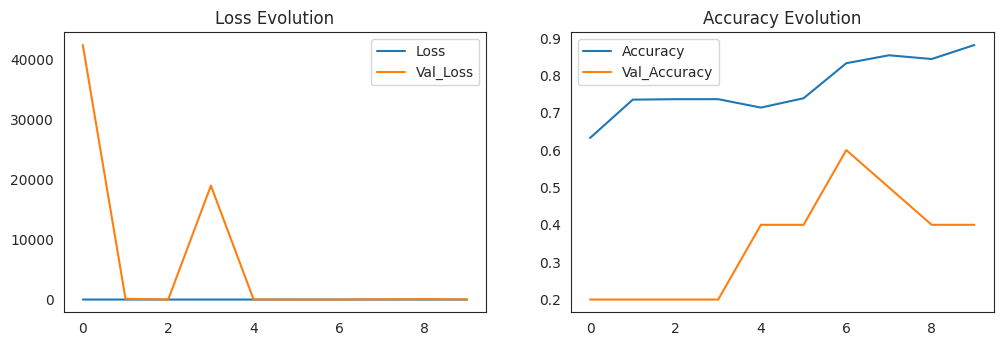

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation =inception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 17s 28ms/step - loss: 0.4811 - accuracy: 0.7548 - precision: 0.7347 - recall: 0.9513
Test Accuracy: 75.48%
652/652 [==============================] - 101s 154ms/step - loss: 0.2551 - accuracy: 0.9155 - precision: 0.9430 - recall: 0.9432
Train Accuracy: 91.55%


## Comparing different models

In [ ]:
model_mae_scores_dict = {'CNN': 87.82, 'CNN_2': 79.49, 'DenseNet' : 83.65, 'VGG16' : 62.50, 'ResNet' : 80.29, 'InceptionNet' : 75.48}

In [ ]:
model_mae_scores_dict

{'CNN': 87.82,
 'CNN_2': 79.49,
 'DenseNet': 83.65,
 'VGG16': 62.5,
 'ResNet': 80.29,
 'InceptionNet': 75.48}

In [ ]:
order =sorted(model_mae_scores_dict.items(), key=lambda x: x[1])
order

[('VGG16', 62.5),
 ('InceptionNet', 75.48),
 ('CNN_2', 79.49),
 ('ResNet', 80.29),
 ('DenseNet', 83.65),
 ('CNN', 87.82)]

In [ ]:
model_names = [item[0] for item in order]
mae_values = [item[1] for item in order]

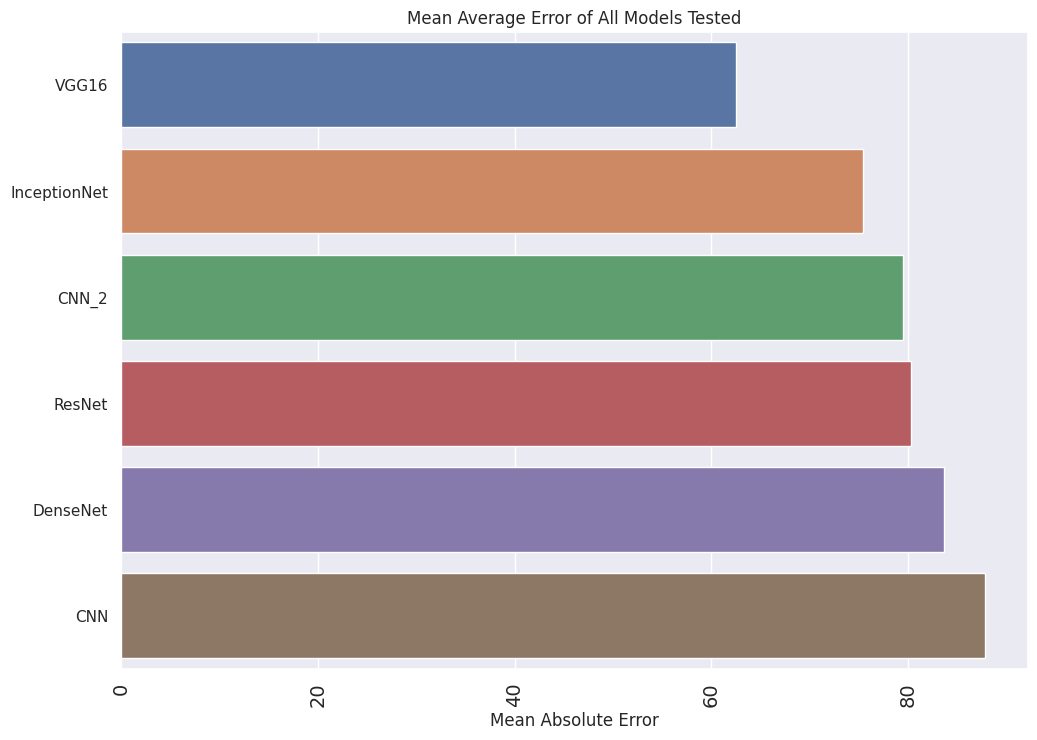

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=mae_values, y=model_names, orient='h')

plt.xlabel('Mean Absolute Error')
plt.xticks(rotation='vertical', fontsize=14)
plt.title('Mean Average Error of All Models Tested')
plt.show()